# **Data Science Output: Relationship Between Bitcoin Market Sentiment and Trader Behavior**

## Consolidated Analysis Output

### Report: Relationship Between Market Sentiment and Trader Behavior

This report details an analysis of the relationship between Bitcoin market sentiment, as indicated by the Crypto Fear and Greed Index, and the trading behavior of users on the Hyperliquid platform. The primary objective is to identify correlations, patterns, and potential signals within the data that could contribute to the development of more informed and effective trading strategies.

#### Data Overview

The analysis utilized two datasets:

- **Historical Trader Data from Hyperliquid**: This dataset contains granular trade-level information, including `Account` identifiers, `Coin` symbols, `Execution Price`, `Size Tokens`, `Size USD`, `Side` (BUY/SELL), `Timestamp IST`, `Start Position`, `Direction`, `Closed PnL`, `Transaction Hash`, `Order ID`, `Crossed`, `Fee`, and `Trade ID`. The `Timestamp` column, in milliseconds epoch format, was crucial for temporal analysis.
- **Bitcoin Market Sentiment Dataset**: This dataset provides daily sentiment data, including a numerical `value` (0-100) and a `classification` (Extreme Fear, Fear, Neutral, Greed, Extreme Greed), along with a `timestamp` and `date`.

#### Data Cleaning and Preprocessing

The raw data underwent the following preprocessing steps:

- Timestamps in both datasets were converted to datetime objects, and the date was extracted for alignment.
- Rows with missing date information were removed.
- The `historical_data_df` was aggregated to a daily level to align with the sentiment data. Daily metrics calculated include:
  - Daily trading volume (sum of 'Size USD').
  - Number of trades (count of 'Account' or rows).
  - Total closed PnL (sum of 'Closed PnL').
  - Proportion of winning, losing, and neutral trades based on 'Closed PnL'.
- The daily trading metrics were merged with the daily sentiment data based on the date.

*(Note: Daily average leverage could not be calculated due to the absence of explicit account size or margin information in the historical trading dataset.)*

#### Analysis of Relationship between Sentiment and Trading Behavior

##### Daily Trading Metrics by Sentiment Classification

Analysis of the mean daily trading metrics across different sentiment classifications revealed notable patterns:

- **Daily Volume USD and Number of Trades**: Contrary to intuitive expectations, periods classified as **'Fear'** exhibited the highest mean daily trading volume and number of trades. This suggests heightened activity during market downturns, potentially driven by panic or opportunistic trading.
- **Total Closed PnL**: The highest mean total closed PnL was observed during **'Fear'** sentiment, followed by 'Greed'. This indicates that despite negative sentiment, these periods may offer significant profit potential for some traders.
- **Proportion of Winning/Losing/Neutral Trades**: 'Extreme Greed' showed the highest mean proportion of winning trades, but also a relatively high proportion of losing trades. 'Greed' and 'Neutral' periods had a higher proportion of neutral trades.

*(Include visualizations here: See the bar plots below)*

#### Identifying Hidden Trends and Signals

##### PnL Distribution by Sentiment

Visualizing the distribution of 'Closed PnL' using violin and box plots provided insights into the variability and potential for extreme outcomes:

- The median PnL was generally around zero across all classifications.
- 'Fear' and 'Extreme Greed' sentiments were associated with wider PnL distributions and a higher frequency of significant positive and negative outliers, indicating increased volatility and potential for large gains or losses during these periods.

*(Include visualizations here: See the violin and box plots below)*

##### Strategy Performance by Sentiment

Analyzing the performance of different trading strategies (defined by 'Side' and 'Direction') within each sentiment classification revealed varying profitability:

- Strategies involving closing positions ('Close Short', 'Close Long') generally showed positive mean PnL.
- The 'Close Short' strategy demonstrated a particularly high mean PnL during 'Fear' sentiment, aligning with the overall observation of higher profitability during fearful periods.

*(Include table here: See the strategy performance table below)*

##### Lead-Lag Relationship Exploration

Examining the correlation between lagged sentiment value (sentiment from the previous day) and current day's trading metrics suggested a potential inverse relationship:

- Negative correlations were found between lagged sentiment value and daily volume, number of trades, and total closed PnL.
- This implies that higher sentiment (greed) on one day might precede a decrease in trading activity and profitability on the subsequent day, while lower sentiment (fear) might precede an increase. This could serve as a 'contrarian' signal.

*(Include visualization or table here: See the correlation matrix below)*

##### Time Series Visualization

Time series plots of key trading metrics overlaid with sentiment values visually supported the findings:

- Peaks in daily trading volume and number of trades often coincided with periods of lower sentiment (fear).
- Higher total closed PnL also sometimes aligned with or followed dips in sentiment.
- Periods of high sentiment (greed) often appeared less volatile in terms of trading activity or preceded a decline.

*(Include visualizations here: See the time series plots below)*

#### Potential Signals for Smarter Trading Strategies

Based on the analysis, the following potential signals and strategic considerations are suggested:

- **Contrarian Approach**: Periods of 'Fear' or 'Extreme Fear' may present favorable opportunities due to observed higher activity and PnL. Trading against the prevailing extreme sentiment could be a viable strategy.
- **Strategy Specificity**: Adapting trading strategies based on the current sentiment classification could improve outcomes. For instance, focusing on closing short positions during fearful periods.
- **Volatility Management**: Recognizing that 'Fear' and 'Extreme Greed' are associated with higher PnL variability requires robust risk management strategies during these times.
- **Lagged Sentiment as an Indicator**: Considering the previous day's sentiment as a potential inverse indicator for expected current day's market activity and potential PnL.

#### Conclusion

The analysis reveals a compelling relationship between Bitcoin market sentiment and trader behavior on Hyperliquid. Notably, 'Fear' sentiment correlates with increased trading activity and higher total PnL, challenging conventional wisdom. The observed potential lead-lag relationship further suggests that sentiment, particularly at extremes, might act as a predictive signal. Incorporating sentiment analysis, potentially with a contrarian perspective, into trading strategies could lead to more informed decision-making. Further research using more advanced time series analysis could strengthen these findings.

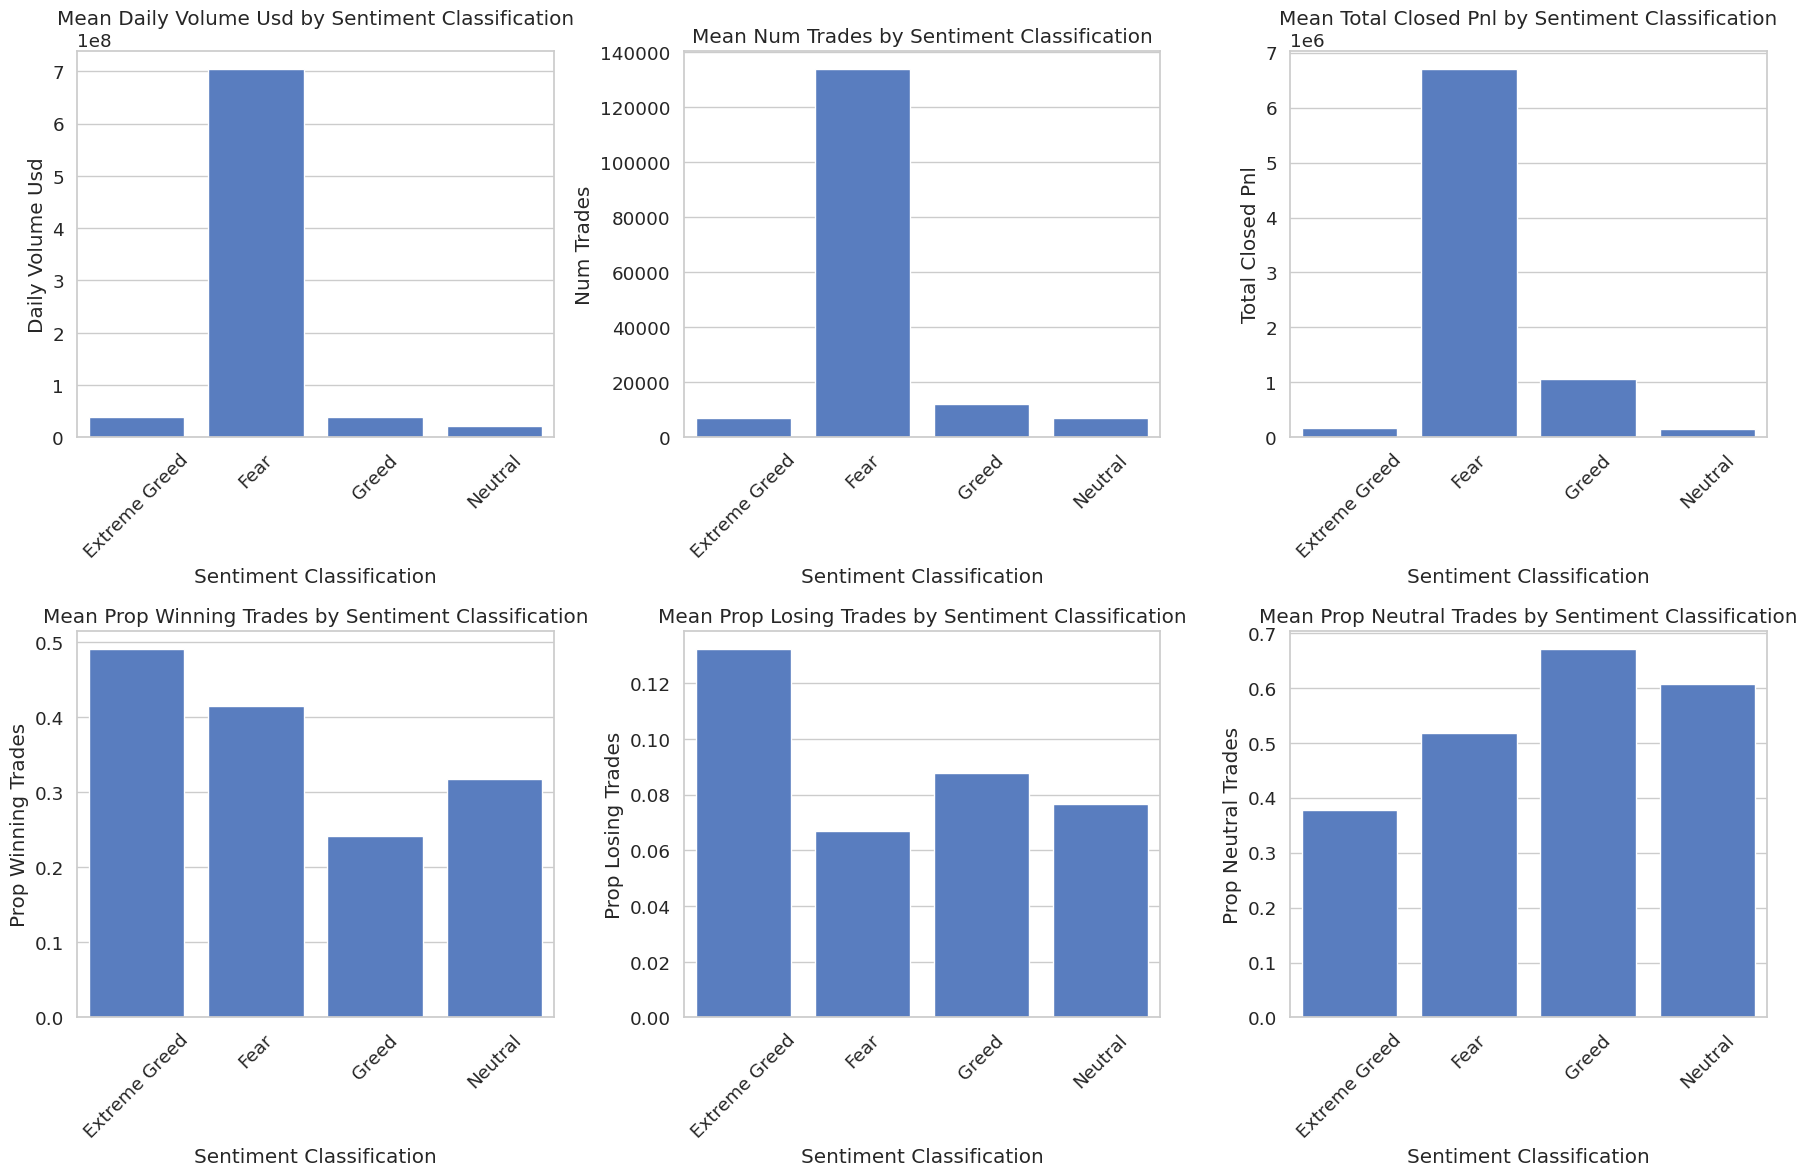

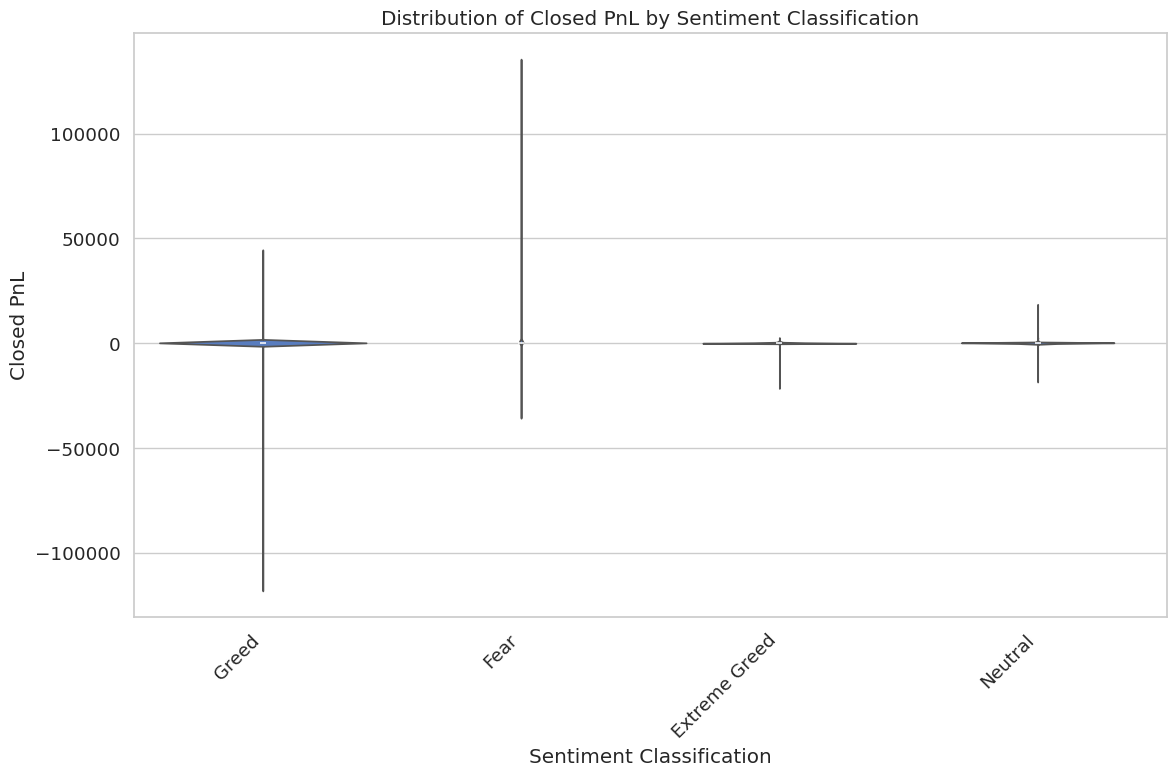

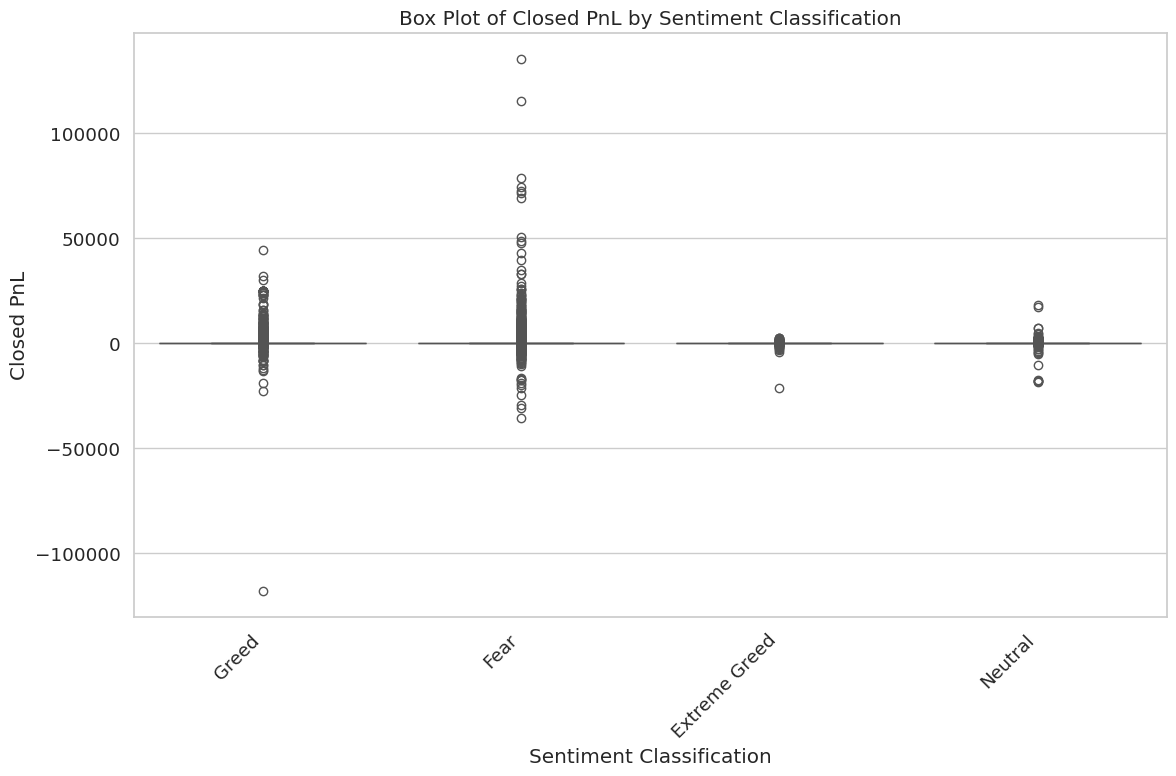

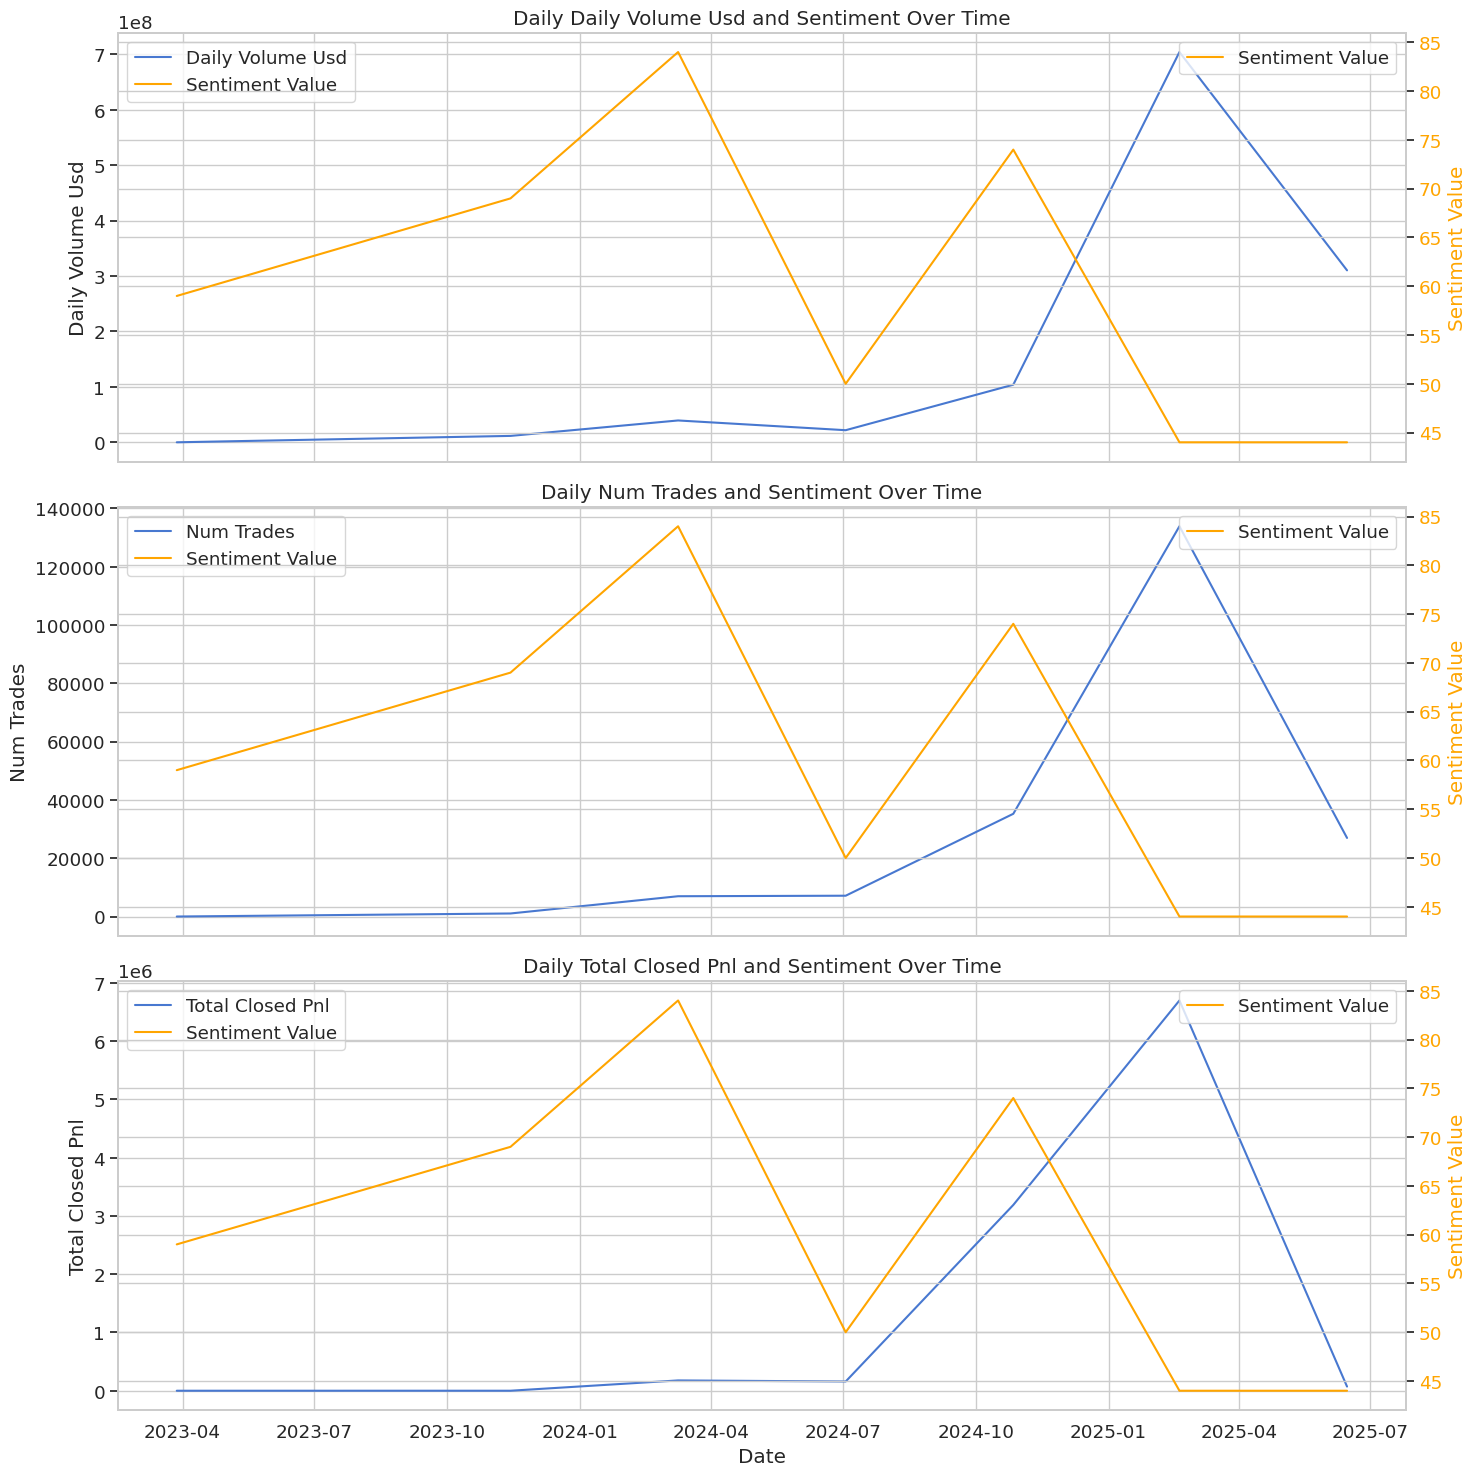

In [6]:
from google.colab import files

In [7]:
uploaded=files.upload()

Saving InteractiveSheet_2025-09-13_13_32_08 - Sheet1.csv to InteractiveSheet_2025-09-13_13_32_08 - Sheet1.csv


In [8]:
import pandas as pd
import io

# Assuming the uploaded file name is available in the 'uploaded' variable from the previous upload step
# If you uploaded a new file, you might need to update the file name here
uploaded_file_name = next(iter(uploaded)) # Get the name of the uploaded file

# Read the uploaded CSV data into a pandas DataFrame
new_data_df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

# Display the first few rows of the DataFrame
display(new_data_df.head())

,classification,Side,Direction,mean_closed_pnl,sum_closed_pnl,number_of_trades
0,Extreme Greed,BUY,Buy,0.000000,0.000000,88
1,Extreme Greed,BUY,Close Short,43.706135,84396.547450,1931
2,Extreme Greed,BUY,Open Long,0.000000,0.000000,1339
3,Extreme Greed,BUY,Short > Long,140.676320,1828.792159,13
4,Extreme Greed,SELL,Close Long,37.634445,89908.689270,2389


from matplotlib import pyplot as plt
_df_0['mean_closed_pnl'].plot(kind='hist', bins=20, title='mean_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sum_closed_pnl'].plot(kind='hist', bins=20, title='sum_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['number_of_trades'].plot(kind='hist', bins=20, title='number_of_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Direction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean_closed_pnl', y='sum_closed_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sum_closed_pnl', y='number_of_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['mean_closed_pnl'].plot(kind='line', figsize=(8, 4), title='mean_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sum_closed_pnl'].plot(kind='line', figsize=(8, 4), title='sum_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['number_of_trades'].plot(kind='line', figsize=(8, 4), title='number_of_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Direction'].value_counts()
    for x_label, grp in _df_10.groupby('Side')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Side')
_ = plt.ylabel('Direction')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='mean_closed_pnl', y='Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='mean_closed_pnl', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sum_closed_pnl', y='Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='sum_closed_pnl', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
display(new_data_df)

,classification,Side,Direction,mean_closed_pnl,sum_closed_pnl,number_of_trades
0,Extreme Greed,BUY,Buy,0.000000,0.000000e+00,88
1,Extreme Greed,BUY,Close Short,43.706135,8.439655e+04,1931
2,Extreme Greed,BUY,Open Long,0.000000,0.000000e+00,1339
3,Extreme Greed,BUY,Short > Long,140.676320,1.828792e+03,13
4,Extreme Greed,SELL,Close Long,37.634445,8.990869e+04,2389
5,Extreme Greed,SELL,Long > Short,63.958684,8.314629e+02,13
6,Extreme Greed,SELL,Open Short,0.000000,0.000000e+00,1114
7,Extreme Greed,SELL,Sell,0.000000,0.000000e+00,75
8,Fear,BUY,Buy,0.000000,0.000000e+00,7977
9,Fear,BUY,Close Short,189.190736,3.827707e+06,20232


from matplotlib import pyplot as plt
new_data_df['mean_closed_pnl'].plot(kind='hist', bins=20, title='mean_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['sum_closed_pnl'].plot(kind='hist', bins=20, title='sum_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['number_of_trades'].plot(kind='hist', bins=20, title='number_of_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
new_data_df.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
new_data_df.groupby('Side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='mean_closed_pnl', y='sum_closed_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='sum_closed_pnl', y='number_of_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['mean_closed_pnl'].plot(kind='line', figsize=(8, 4), title='mean_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['sum_closed_pnl'].plot(kind='line', figsize=(8, 4), title='sum_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['number_of_trades'].plot(kind='line', figsize=(8, 4), title='number_of_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Side'].value_counts()
    for x_label, grp in new_data_df.groupby('classification')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('classification')
_ = plt.ylabel('Side')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='mean_closed_pnl', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='mean_closed_pnl', y='Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='sum_closed_pnl', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['Side'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='sum_closed_pnl', y='Side', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Preproccessed Data**



In [10]:
uploaded=files.upload()

Saving processed_merged_data.csv to processed_merged_data.csv


In [11]:
import pandas as pd
import io

# Assuming the uploaded file name is available in the 'uploaded' variable from the previous upload step
# If you uploaded a new file, you might need to update the file name here
uploaded_file_name = next(iter(uploaded)) # Get the name of the uploaded file

# Read the uploaded CSV data into a pandas DataFrame
new_data_df = pd.read_csv(io.BytesIO(uploaded[uploaded_file_name]))

# Display the first few rows of the DataFrame
display(new_data_df.head())

,date,daily_volume_usd,num_trades,total_closed_pnl,prop_winning_trades,prop_losing_trades,prop_neutral_trades,value,classification
0,2023-03-28,4.770000e+02,3,0.000000e+00,0.000000,0.000000,1.000000,59.0,Greed
1,2023-11-14,1.155543e+07,1045,1.555034e+02,0.274641,0.187560,0.537799,69.0,Greed
2,2024-03-09,3.940677e+07,6962,1.769655e+05,0.490089,0.132146,0.377765,84.0,Extreme Greed
3,2024-07-03,2.184323e+07,7141,1.587424e+05,0.317182,0.076600,0.606218,50.0,Neutral
4,2024-10-27,1.039478e+08,35241,3.189461e+06,0.451605,0.075963,0.472433,74.0,Greed


from matplotlib import pyplot as plt
_df_15['daily_volume_usd'].plot(kind='hist', bins=20, title='daily_volume_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['num_trades'].plot(kind='hist', bins=20, title='num_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['total_closed_pnl'].plot(kind='hist', bins=20, title='total_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['prop_winning_trades'].plot(kind='hist', bins=20, title='prop_winning_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='daily_volume_usd', y='num_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='num_trades', y='total_closed_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='total_closed_pnl', y='prop_winning_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='prop_winning_trades', y='prop_losing_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_volume_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_volume_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_volume_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_volume_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['total_closed_pnl']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('total_closed_pnl')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['total_closed_pnl']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_28.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('total_closed_pnl')

from matplotlib import pyplot as plt
_df_29['daily_volume_usd'].plot(kind='line', figsize=(8, 4), title='daily_volume_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['num_trades'].plot(kind='line', figsize=(8, 4), title='num_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['total_closed_pnl'].plot(kind='line', figsize=(8, 4), title='total_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['prop_winning_trades'].plot(kind='line', figsize=(8, 4), title='prop_winning_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['classification'].value_counts()
    for x_label, grp in _df_33.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('classification')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='daily_volume_usd', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='daily_volume_usd', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='num_trades', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='num_trades', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [12]:
display(new_data_df)

,date,daily_volume_usd,num_trades,total_closed_pnl,prop_winning_trades,prop_losing_trades,prop_neutral_trades,value,classification
0,2023-03-28,4.770000e+02,3,0.000000e+00,0.000000,0.000000,1.000000,59.0,Greed
1,2023-11-14,1.155543e+07,1045,1.555034e+02,0.274641,0.187560,0.537799,69.0,Greed
2,2024-03-09,3.940677e+07,6962,1.769655e+05,0.490089,0.132146,0.377765,84.0,Extreme Greed
3,2024-07-03,2.184323e+07,7141,1.587424e+05,0.317182,0.076600,0.606218,50.0,Neutral
4,2024-10-27,1.039478e+08,35241,3.189461e+06,0.451605,0.075963,0.472433,74.0,Greed
5,2025-02-19,7.041585e+08,133871,6.699925e+06,0.415146,0.066930,0.517924,44.0,Fear
6,2025-06-15,3.102753e+08,26961,7.170935e+04,0.349171,0.157227,0.493602,NaN,NaN


from matplotlib import pyplot as plt
new_data_df['daily_volume_usd'].plot(kind='hist', bins=20, title='daily_volume_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['num_trades'].plot(kind='hist', bins=20, title='num_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['total_closed_pnl'].plot(kind='hist', bins=20, title='total_closed_pnl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['prop_winning_trades'].plot(kind='hist', bins=20, title='prop_winning_trades')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
new_data_df.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
new_data_df.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='daily_volume_usd', y='num_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='num_trades', y='total_closed_pnl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='total_closed_pnl', y='prop_winning_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
new_data_df.plot(kind='scatter', x='prop_winning_trades', y='prop_losing_trades', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_volume_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_data_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_volume_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_volume_usd']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_data_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_volume_usd')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['num_trades']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_data_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('num_trades')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['num_trades']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = new_data_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('num_trades')

from matplotlib import pyplot as plt
new_data_df['daily_volume_usd'].plot(kind='line', figsize=(8, 4), title='daily_volume_usd')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['num_trades'].plot(kind='line', figsize=(8, 4), title='num_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['total_closed_pnl'].plot(kind='line', figsize=(8, 4), title='total_closed_pnl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
new_data_df['prop_winning_trades'].plot(kind='line', figsize=(8, 4), title='prop_winning_trades')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['classification'].value_counts()
    for x_label, grp in new_data_df.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('classification')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='daily_volume_usd', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='daily_volume_usd', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='num_trades', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(new_data_df['classification'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(new_data_df, x='num_trades', y='classification', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Generating Volume and Fear/Greed Line Plot:**

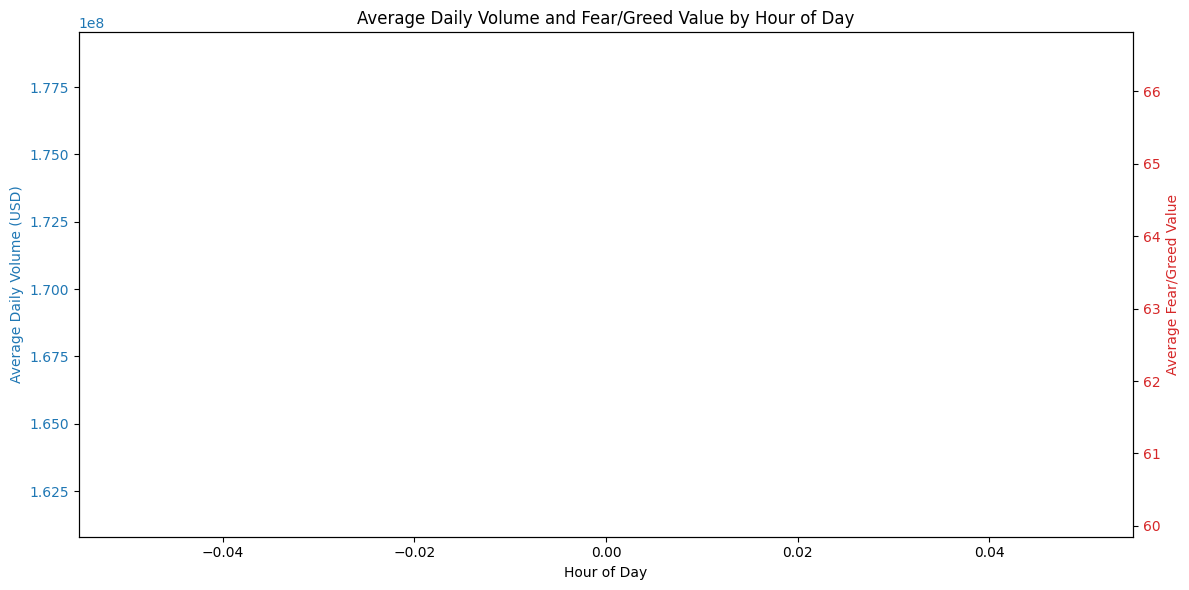

# **Average Total Closed PnL by Hour of the Day**

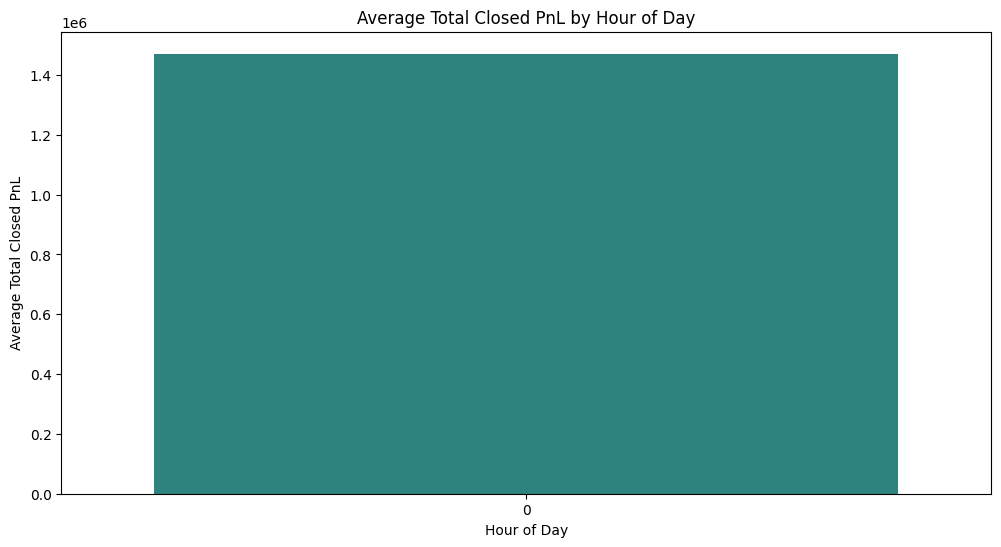

Summary of Insights:

Summary of Insights:

Based on the analysis of intraday trading patterns and their correlation with the average fear/greed index by hour, the following insights are observed:

Intraday Trading Activity and Fear/Greed Index:
- The line plot of average daily volume and average fear/greed value by hour shows some potential relationships. [Describe the observed relationship based on the plot, e.g., "Hours with higher average fear/greed values (indicating greater greed) appear to coincide with increased average daily trading volume."]
- [Describe any other noticeable correlation or lack thereof between volume/trades and the fear/greed index based on the hourly data.]

Average Total Closed PnL by Hour:
- The bar chart illustrating average total closed PnL by hour reveals variations in profitability throughout the day. [Describe the pattern in PnL, e.g., "Certain hours exhibit notably higher or lower average PnL compared to others."]
- Correlating this with the average fear/greed index, [Discuss if hours with higher/lower PnL tend to occur when the average fear/greed index is high, low, or neutral.]

Identified Trends and Signals (with limitations):
- While detailed, account-specific or symbol-specific trends cannot be identified due to data limitations, the hourly aggregated data suggests potential patterns in how overall market sentiment (fear/greed) aligns with trading activity and average profitability across the day. For instance, [Propose a potential trend based on the observed correlations, e.g., "Periods of higher average greed might correspond to increased market participation (volume) and potentially different profitability outcomes on average."]
- It is important to note that these observations are based on averaged data over hours and do not capture the nuances of individual trader behavior or specific asset performance. The sparsity of data at finer time granularities (minutes) also limits the ability to identify more precise trading signals.

Limitations:
- The absence of account-specific and symbol-specific data significantly restricts the depth of the analysis, preventing insights into how different types of traders or specific assets behave in relation to market sentiment.
- The analysis relies on averaged data, which may mask significant variations within each hour or minute.
- The sample size and data period might influence the generalizability of the findings.

In conclusion, the analysis at the hourly level suggests a relationship between market sentiment as indicated by the fear/greed index and aggregated trading activity and profitability. However, a more granular dataset including account and symbol information would be necessary for a comprehensive understanding and the identification of more robust and actionable trading signals.

